# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее', 'Два и более высших образования', 'Неполное среднее', 'Среднее специальное', 'Ученая степень', 'Неоконченное высшее'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Недвижимость', 'Государственная служба', 'Нефтегазовая промышленность', 'Туризм', 'Страхование', 'Здравоохранение', 'Информационные услуги', 'Транспорт', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Химия/Парфюмерия/Фармацевтика', 'Энергетика', 'Наука', 'Строительство', 'Информационные технологии', 'Сельское хозяйство', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Салоны красоты и здоровья', 'Торговля', 'Банк/Финансы', 'Сборочные производства', 'Маркетинг', 'Другие сферы', 'Юридические услуги/нотариальные услуги', 'Развлечения/Искусство', 'Управляющая компания', 'Коммунальное хоз-во/Дорожные службы', 'Образование'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
#Код немного исправил, чтобы изменения появились в датафрейме
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [15]:
df.PERSONAL_INCOME.describe()

count    3.013300e+04
mean     1.424053e+04
std      7.532688e+04
min      2.400000e+01
25%      8.000000e+03
50%      1.200000e+04
75%      1.650000e+04
max      1.300000e+07
Name: PERSONAL_INCOME, dtype: float64

In [16]:
# Перекодируем схожие строки для возможности работы с ними

'''
CREDIT                        30133 non-null object
FST_PAYMENT                   30133 non-null object
LOAN_AVG_DLQ_AMT              30133 non-null object
LOAN_MAX_DLQ_AMT              30133 non-null object
'''
for x in ['CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    df[x] = df[x].map(lambda x: x.replace(',', '.')).astype('float')

In [17]:
# попытка поиска числовых признаков, которые больше категорийные
'''for i in df.columns:
    print(df[i].value_counts())
    AGE
    SOCSTATUS_WORK_FL
    SOCSTATUS_PENS_FL
    GENDER
    CHILD_TOTAL
    DEPENDANTS
    EDUCATION
    MARITAL_STATUS
    GEN_INDUSTRY
    GEN_TITLE
    ORG_TP_STATE
    ORG_TP_FCAPITAL
    FAMILY_INCOME
'''

'for i in df.columns:\n    print(df[i].value_counts())\n    AGE\n    SOCSTATUS_WORK_FL\n    SOCSTATUS_PENS_FL\n    GENDER\n    CHILD_TOTAL\n    DEPENDANTS\n    EDUCATION\n    MARITAL_STATUS\n    GEN_INDUSTRY\n    GEN_TITLE\n    ORG_TP_STATE\n    ORG_TP_FCAPITAL\n    FAMILY_INCOME\n'

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [18]:
'''
Да, пропуски в данных есть. 

Всего строк - 30132

Данные пропущены в 5 категориальных и 2х числовых столбцах.:

GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object

WORK_TIME                     27416 non-null float64
PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

1. Значения PREVIOUS_CARD_NUM_UTILIZED нужно заменить на 0 согласно описанию данного признака:
("количество уже утилизированных карт (если пусто - 0)" ), так и сделаем. 
2. Данные, кроме WORK_TIME - числовые, пропущено строк не много, возмем медианное значение из этого 
столбца и заполним пропущеные значения. 
(В будущем можно попробовать подставить среднее т.к. медианное  = 48.0 а среднее = 189.58)

'''

'\nДа, пропуски в данных есть. \n\nВсего строк - 30132\n\nДанные пропущены в 5 категориальных и 2х числовых столбцах.:\n\nGEN_INDUSTRY                  27420 non-null object\nGEN_TITLE                     27420 non-null object\nORG_TP_STATE                  27420 non-null object\nORG_TP_FCAPITAL               27425 non-null object\nJOB_DIR                       27420 non-null object\nTP_PROVINCE                   29543 non-null object\n\nWORK_TIME                     27416 non-null float64\nPREVIOUS_CARD_NUM_UTILIZED    600 non-null float64\n\n1. Значения PREVIOUS_CARD_NUM_UTILIZED нужно заменить на 0 согласно описанию данного признака:\n("количество уже утилизированных карт (если пусто - 0)" ), так и сделаем. \n2. Данные, кроме WORK_TIME - числовые, пропущено строк не много, возмем медианное значение из этого \nстолбца и заполним пропущеные значения. \n(В будущем можно попробовать подставить среднее т.к. медианное  = 48.0 а среднее = 189.58)\n\n'

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [19]:
'''3. С категориальными признаками подобрать данные будет не просто. По этому, после преобразований выше, 
- удалим пустые строки везде, где пропущены строки:

GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object

4. Категориальные признаки, которые являются числовыми - я преобразовал ранее по примеру.

* Очень много числовых признаков, которые больше схожи на категорийные, 
для повышения качества модели можно попытаться сделать двойную конвертацию: Числовой -> Object признак 
-> методом Get_dummies снова в числовой '''

'3. С категориальными признаками подобрать данные будет не просто. По этому, после преобразований выше, \n- удалим пустые строки везде, где пропущены строки:\n\nGEN_INDUSTRY                  27420 non-null object\nGEN_TITLE                     27420 non-null object\nORG_TP_STATE                  27420 non-null object\nORG_TP_FCAPITAL               27425 non-null object\nJOB_DIR                       27420 non-null object\nTP_PROVINCE                   29543 non-null object\n\n4. Категориальные признаки, которые являются числовыми - я преобразовал ранее по примеру.\n\n* Очень много числовых признаков, которые больше схожи на категорийные, \nдля повышения качества модели можно попытаться сделать двойную конвертацию: Числовой -> Object признак \n-> методом Get_dummies снова в числовой '

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [20]:
def preproc_data(df_input):
   
    df_output = df_input.copy()

    #0. Удалим идентификатор AGREEMENT_RK
    df_output.drop('AGREEMENT_RK', axis = 1, inplace = True)


    #1. Заменим пропуски на 0
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace = True)

    #2. Подставим медианное значение в пустые строки
    df_wt_m = df_output['WORK_TIME'].median()#это медианное значение
    df_output['WORK_TIME'].fillna(df_wt_m, inplace  = True)
    

    #3 удалим данные, которые пропущены (потери составят около 10%)
    df_output.dropna(inplace = True)
      
    #4 остается 14 категориальных признаков. с помощью метода dummies превратим их в числовые.
    df_output = pd.get_dummies(df_output, columns = ['EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR','FAMILY_INCOME','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM'])
    print(df_output.info())

    return df_output

In [21]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample','TARGET'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample','TARGET'], axis=1)

df_target_train_preproc = df_preproc.query('sample == "train"')['TARGET']
df_target_test_preproc = df_preproc.query('sample == "test"')['TARGET']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26843 entries, 0 to 30132
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), object(1), uint8(404)
memory usage: 18.5+ MB
None


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

#### Задание 5. Обучение и оценка качества разных моделей

In [22]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X, X_test, y, y_test = train_test_split(df_train_preproc, df_target_train_preproc, test_size = 0.3, random_state = 42)

In [23]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
tree = DecisionTreeClassifier(random_state=42)
r_f = RandomForestClassifier(random_state=42)
reg = LogisticRegression(random_state=42)

In [24]:
tree.fit(X,y)
tr_predict = tree.predict(X_test)
tr_predict_proba = tree.predict_proba(X_test)

In [25]:
r_f.fit(X,y)
r_f_predict = r_f.predict(X_test)
r_f_predict_proba = r_f.predict_proba(X_test)

In [26]:
reg.fit(X,y)
reg_predict = reg.predict(X_test)
reg_predict_proba = reg.predict_proba(X_test)

In [29]:
def metrics_scores(act_val, pred_val):
    return accuracy_score(act_val, pred_val),precision_score(act_val, pred_val),recall_score(act_val, pred_val)

In [30]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print("Desc Tree")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, tr_predict), precision_score(y_test, tr_predict),recall_score(y_test, tr_predict)))
print("Predict_proba:(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, tr_predict_proba[:,1]), precision_score(y_test, tr_predict_proba[:,1]),recall_score(y_test, tr_predict_proba[:,1])))

print("")

print("Rand Forest")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, r_f_predict), precision_score(y_test, r_f_predict),recall_score(y_test, r_f_predict)))
print("Predict_proba:(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, r_f_predict_proba[:,1].round()), precision_score(y_test, r_f_predict_proba[:,1].round()),recall_score(y_test, r_f_predict_proba[:,1].round())))
print("")

print("Logistics regression")

print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, reg_predict), precision_score(y_test, reg_predict),recall_score(y_test, reg_predict)))
print("Predict_proba:(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, reg_predict_proba[:,1].round()), precision_score(y_test, reg_predict_proba[:,1].round()),recall_score(y_test, reg_predict_proba[:,1].round())))


Desc Tree
Predict      :(Acc: 0.7858020142471137 , Pres: 0.14909090909090908 , Rec: 0.16872427983539096) :
Predict_proba:(Acc: 0.7858020142471137 , Pres: 0.14909090909090908 , Rec: 0.16872427983539096) :

Rand Forest
Predict      :(Acc: 0.8771800540407763 , Pres: 0.1111111111111111 , Rec: 0.00411522633744856) :
Predict_proba:(Acc: 0.8771800540407763 , Pres: 0.1111111111111111 , Rec: 0.00411522633744856) :

Logistics regression
Predict      :(Acc: 0.8801277327437976 , Pres: 0.0 , Rec: 0.0) :
Predict_proba:(Acc: 0.8801277327437976 , Pres: 0.0 , Rec: 0.0) :


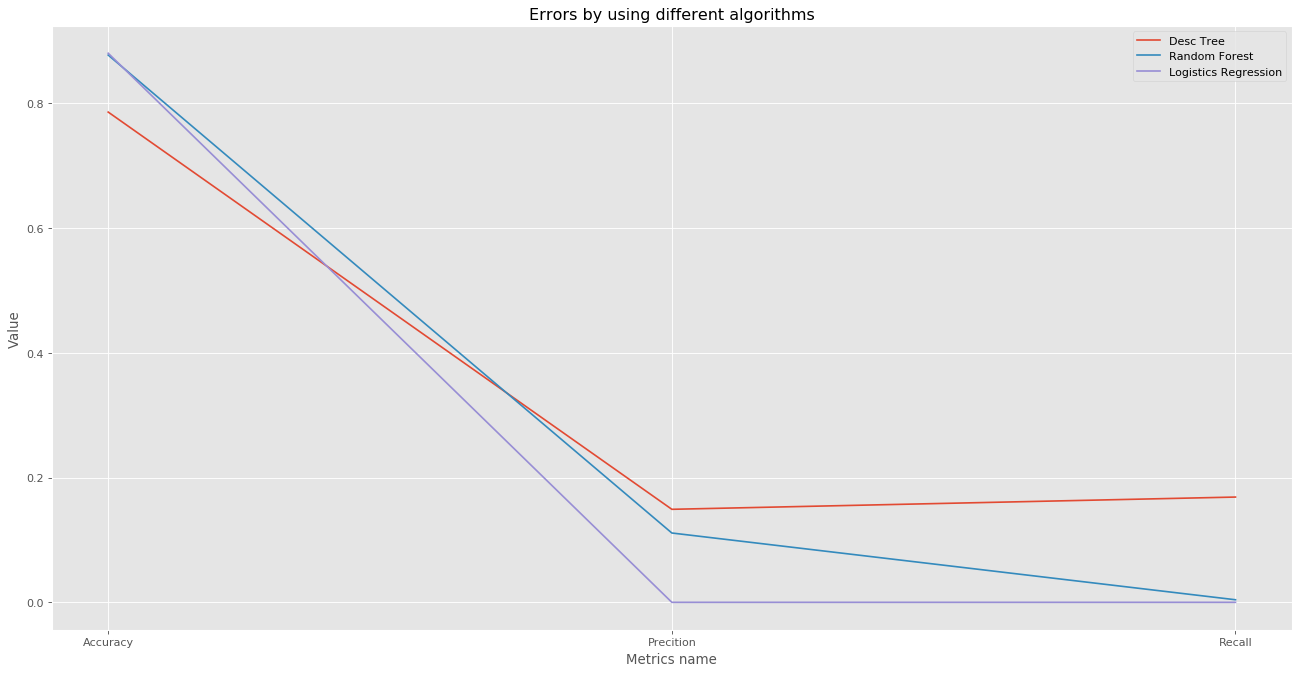

In [31]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
plt.figure(figsize=(20,10), dpi=80)
plt.xlabel('Metrics name')
plt.ylabel('Value')
plt.title('Errors by using different algorithms')
plot1 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,tr_predict), label = 'Desc Tree')
plot2 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,r_f_predict), label = 'Random Forest')
plot3 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,reg_predict), label = 'Logistics Regression')
plt.legend(loc = 'upper right')


(-0.01, 1.01)

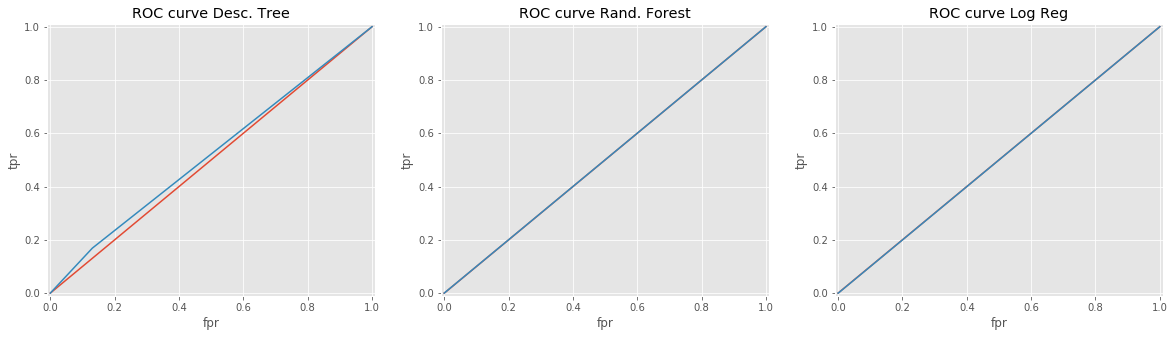

In [32]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tr_predict)
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Desc. Tree')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

#второй график
fpr, tpr, thresholds = roc_curve(y_test, r_f_predict)
plt.subplot(132)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Rand. Forest')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
#второй график
fpr, tpr, thresholds = roc_curve(y_test, reg_predict)
plt.subplot(133)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Log Reg')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

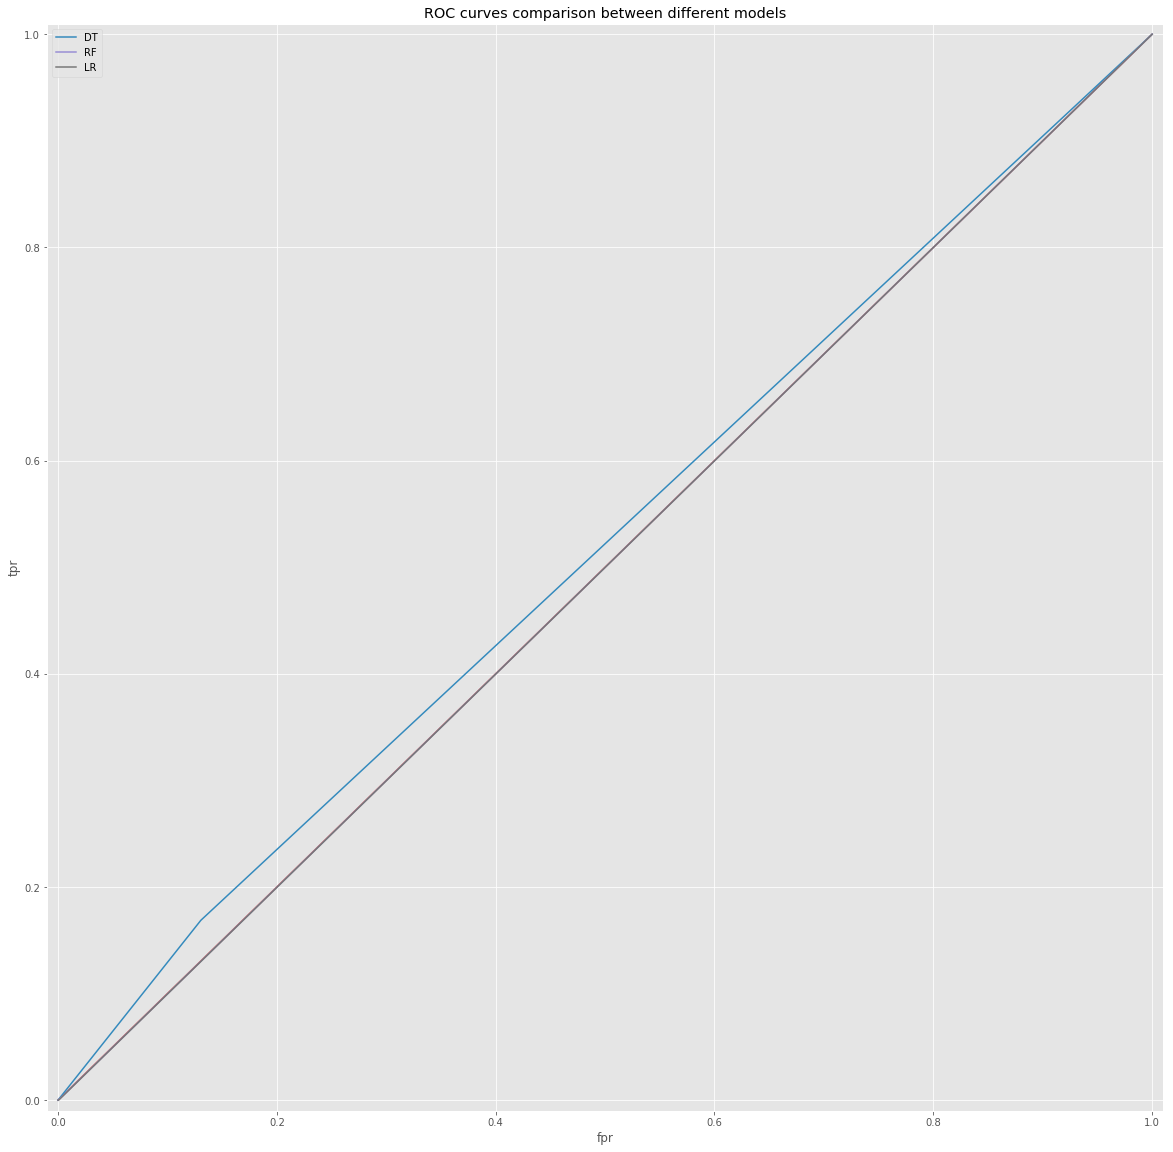

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, tr_predict)
fpr_1, tpr_1, thresholds = roc_curve(y_test, r_f_predict)
fpr_2, tpr_2, thresholds = roc_curve(y_test, reg_predict)
plt.figure(figsize=(20, 20))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, label = 'DT')
plt.plot(fpr_1, tpr_1, label = 'RF')
plt.plot(fpr_2, tpr_2, label = 'LR')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curves comparison between different models')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [35]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
# for DT
print(np.mean(cross_val_score(
    tree,
    X,
    y,
    scoring='roc_auc',
    cv=10
)))


C:\Users\morvla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.5310289451078096


In [36]:
#for RF
print(np.mean(cross_val_score(
    r_f,
    X,
    y,
    scoring='roc_auc',
    cv=10
)))

0.5820744599088415


In [37]:
#for LR
print(np.mean(cross_val_score(
    reg,
    X,
    y,
    scoring='roc_auc',
    cv=10
)))

0.6139017167174314


In [38]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
reg_predict_train_data = reg.predict_proba(df_test_preproc)

C:\Users\morvla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [39]:
print(reg_predict_train_data)

[[0.84565571 0.15434429]
 [0.82869838 0.17130162]
 [0.79523117 0.20476883]
 ...
 [0.8750662  0.1249338 ]
 [0.80585917 0.19414083]
 [0.78633961 0.21366039]]


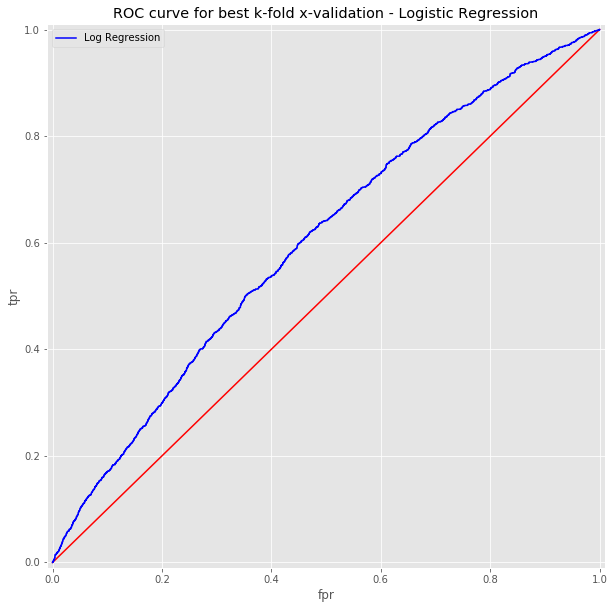

In [44]:
# Померить roc_auc на тесте
fpr, tpr, thresholds = roc_curve(df_target_test_preproc, reg_predict_train_data[:,1])
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color = 'red')
plt.plot(fpr, tpr, label = 'Log Regression', color = 'blue')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve for best k-fold x-validation - Logistic Regression')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()